In [20]:
! pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
df1 = pd.read_csv("Combined_News_DJIA.csv", encoding='latin1')
df2 = pd.read_csv("upload_DJIA_table.csv", encoding='latin1')


In [23]:
df1.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [24]:
df1.shape

(1989, 27)

In [25]:
df2.shape

(1989, 7)

In [ ]:
headlines = []
for row in range(0,len(merge.index)):
    headlines.append(' '.join(str(x) for x in merge.iloc[row,2:27]))
clean_headlines = []
for i in range(0, len(headlines)):
    clean_headlines.append(re.sub("b[(')]", '', headlines[i]))
    clean_headlines[i] = re.sub('b[(")]', '', clean_headlines[i])
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i])

In [27]:
! pip install nltk spacy pandas
! pip install en_core_web_sm


In [28]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize Stemmer and Lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts."""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def stem_text(text):
    """Stem the text."""
    return ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(text)])

def lemmatize_text(text):
    """Lemmatize the text."""
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(text)])

# Preprocess a single text
def preprocess_text(text):
    text = text.lower()  # Lowercase the text
    text = lemmatize_text(text)  # Lemmatize the text
    text = stem_text(text)  # Stem the text
    return text

# Load the dataset
file_path = '/content/Combined_News_DJIA.csv'
df = pd.read_csv(file_path)

# Apply preprocessing to all headline columns
headline_columns = [f'Top{i}' for i in range(1, 26)]

for col in headline_columns:
    df[col] = df[col].astype(str).apply(preprocess_text)

# Display the first few rows of the preprocessed data
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


         Date  Label                                               Top1  \
0  2008-08-08      0  b `` georgia 'down two russian warplan ' a cou...   
1  2008-08-11      1  b'whi wont america and nato help u ? if they w...   
2  2008-08-12      0  b'rememb that ador 9-year-old who sang at the ...   
3  2008-08-13      0  b ' u.s. refus israel weapon to attack iran : ...   
4  2008-08-14      1  b'all the expert admit that we should legalis ...   

                                                Top2  \
0              b'break : musharraf to be impeach . '   
1        b'bush put foot down on georgian conflict '   
2                 b `` russia 'end georgia oper ' ``   
3  b `` when the presid order to attack tskhinval...   
4  b'war in south osetia - 89 pictur make by a ru...   

                                                Top3  \
0  b'russia today : column of troop roll into sou...   
1  b `` jewish georgian minist : thank to isra tr...   
2  b ' `` if we have no sexual harass we wou

In [29]:
headlines = []
for row in range(0,len(merge.index)):
    headlines.append(' '.join(str(x) for x in merge.iloc[row,2:27]))
clean_headlines = []
for i in range(0, len(headlines)):
    clean_headlines.append(re.sub("b[(')]", '', headlines[i]))
    clean_headlines[i] = re.sub('b[(")]', '', clean_headlines[i])
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i])

In [35]:
df.shape

(1989, 27)

In [38]:
df2['Date'] = pd.to_datetime(df2['Date'])
df['Date'] = pd.to_datetime(df['Date'])


In [39]:
merge = df.merge(df2, how = 'inner', on = 'Date')

In [15]:
merge

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,b `` georgia 'down two russian warplan ' a cou...,b'break : musharraf to be impeach . ',b'russia today : column of troop roll into sou...,b'russian tank be move toward the capit of sou...,"b `` afghan child rap with 'impun , ' u.n. off...",b'150 russian tank have enter south ossetia wh...,"b `` break : georgia invad south ossetia , rus...",b `` the 'enemi combat ' trial be noth but a s...,...,b'caucasu in crisi : georgia invad south osset...,b'indian shoe manufactori - and again in a ser...,b'visitor suffer from mental ill ban from olymp ',b `` no help for mexico 's kidnap surg ``,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'whi wont america and nato help u ? if they w...,b'bush put foot down on georgian conflict ',b `` jewish georgian minist : thank to isra tr...,b'georgian armi flee in disarray a russian adv...,b `` olymp open ceremoni firework 'fake ' ``,b'what be the mossad with fraudul new zealand ...,b'russia anger by isra militari sale to georgia ',b'an american citizen live in s.ossetia blame ...,...,b ' russia have just beaten the unit state ove...,b'perhap * the * question about the georgia - ...,b'russia be so much well at war ',b `` so thi be what it 's come to : trade sex ...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'rememb that ador 9-year-old who sang at the ...,b `` russia 'end georgia oper ' ``,b ' `` if we have no sexual harass we would ha...,b `` al-qa'eda be lose support in iraq becaus ...,b'ceasefir in georgia : putin outmaneuv the we...,b'whi microsoft and intel tri to kill the xo $...,b'stratfor : the russo-georgian war and the ba...,b `` i 'm tri to get a sens of thi whole georg...,...,b'all sign point to the u encourag georgia to ...,b'christoph king argu that the u and nato be b...,b'america : the new mexico ? ',b `` bbc news | asia-pacif | extinct 'bi man n...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b ' u.s. refus israel weapon to attack iran : ...,b `` when the presid order to attack tskhinval...,b ' israel clear troop who kill reuter cameram...,b'britain\ 's polici of be tough on drug be ``...,b'bodi of 14 year old found in trunk ; late ( ...,b'china have move 10 * million * quak survivor...,b `` bush announc oper get all up in russia 's...,b'russian forc sink georgian ship ',...,b'wit : russian forc head toward tbilisi in br...,b ' quarter of russian blame u.s. for conflict...,b'georgian presid say u militari will take con...,b'2006 : nobel laureat aleksand solzhenitsyn a...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'all the expert admit that we should legalis ...,b'war in south osetia - 89 pictur make by a ru...,b'swedish wrestler ara abrahamian throw away m...,b'russia exagger the death toll in south osset...,b'missil that kill 9 insid pakistan may have b...,b `` rushdi condemn random hous 's refus to pu...,b'poland and u agre to missl defens deal . int...,b'will the russian conquer tblisi ? bet on it ...,...,b'taliban wage war on humanitarian aid worker ',b'russia : world `` can forget about `` georgi...,b'darfur rebel accus sudan of mount major atta...,b'philippin : peac advoc say muslim need assur...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,barclay and rb share suspend from trade after ...,pope say church should ask forgiv from gay for...,poland 'shock ' by xenophob abus of pole in uk,"there will be no second referendum , cabinet agre","scotland welcom to join eu , merkel alli say",sterl dip below friday 's 31-year low amid bre...,no neg news about south african presid allow o...,surg in hate crime in the u.k. follow u.k. bre...,...,

In [40]:
merge['Combined_News'] = df[headline_columns].apply(lambda x: ' '.join(x), axis=1)
merge['Combined_News'][0]

"b `` georgia 'down two russian warplan ' a countri move to brink of war `` b'break : musharraf to be impeach . ' b'russia today : column of troop roll into south ossetia ; footag from fight ( youtub ) ' b'russian tank be move toward the capit of south ossetia , which have reportedli be complet destroy by georgian artilleri fire ' b `` afghan child rap with 'impun , ' u.n. offici say - thi be sick , a three year old be rap and they do noth `` b'150 russian tank have enter south ossetia whilst georgia shoot down two russian jet . ' b `` break : georgia invad south ossetia , russia warn it would interven on so 's side `` b `` the 'enemi combat ' trial be noth but a sham : salim haman have be sentenc to 5 1/2 year , but will be kept longer anyway just becaus they feel like it . `` b'georgian troop retreat from s. osettain capit , presum leav sever hundr peopl kill . [ video ] ' b'did the u.s. prep georgia for war with russia ? ' b'rice give green light for israel to attack iran : say u.s.

In [41]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
0,2008-08-08,0,b `` georgia 'down two russian warplan ' a cou...,b'break : musharraf to be impeach . ',b'russia today : column of troop roll into sou...,b'russian tank be move toward the capit of sou...,"b `` afghan child rap with 'impun , ' u.n. off...",b'150 russian tank have enter south ossetia wh...,"b `` break : georgia invad south ossetia , rus...",b `` the 'enemi combat ' trial be noth but a s...,...,b'indian shoe manufactori - and again in a ser...,b'visitor suffer from mental ill ban from olymp ',b `` no help for mexico 's kidnap surg ``,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b `` georgia 'down two russian warplan ' a cou...
1,2008-08-11,1,b'whi wont america and nato help u ? if they w...,b'bush put foot down on georgian conflict ',b `` jewish georgian minist : thank to isra tr...,b'georgian armi flee in disarray a russian adv...,b `` olymp open ceremoni firework 'fake ' ``,b'what be the mossad with fraudul new zealand ...,b'russia anger by isra militari sale to georgia ',b'an american citizen live in s.ossetia blame ...,...,b'perhap * the * question about the georgia - ...,b'russia be so much well at war ',b `` so thi be what it 's come to : trade sex ...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,b'whi wont america and nato help u ? if they w...
2,2008-08-12,0,b'rememb that ador 9-year-old who sang at the ...,b `` russia 'end georgia oper ' ``,b ' `` if we have no sexual harass we would ha...,b `` al-qa'eda be lose support in iraq becaus ...,b'ceasefir in georgia : putin outmaneuv the we...,b'whi microsoft and intel tri to kill the xo $...,b'stratfor : the russo-georgian war and the ba...,b `` i 'm tri to get a sens of thi whole georg...,...,b'christoph king argu that the u and nato be b...,b'america : the new mexico ? ',b `` bbc news | asia-pacif | extinct 'bi man n...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,b'rememb that ador 9-year-old who sang at the ...


In [42]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [43]:
merge['Subjectivity'] = merge['Combined_News'].apply(getSubjectivity)
merge['Polarity'] = merge['Combined_News'].apply(getPolarity)

In [44]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity
0,2008-08-08,0,b `` georgia 'down two russian warplan ' a cou...,b'break : musharraf to be impeach . ',b'russia today : column of troop roll into sou...,b'russian tank be move toward the capit of sou...,"b `` afghan child rap with 'impun , ' u.n. off...",b'150 russian tank have enter south ossetia wh...,"b `` break : georgia invad south ossetia , rus...",b `` the 'enemi combat ' trial be noth but a s...,...,b `` no help for mexico 's kidnap surg ``,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b `` georgia 'down two russian warplan ' a cou...,0.331400,-0.065335
1,2008-08-11,1,b'whi wont america and nato help u ? if they w...,b'bush put foot down on georgian conflict ',b `` jewish georgian minist : thank to isra tr...,b'georgian armi flee in disarray a russian adv...,b `` olymp open ceremoni firework 'fake ' ``,b'what be the mossad with fraudul new zealand ...,b'russia anger by isra militari sale to georgia ',b'an american citizen live in s.ossetia blame ...,...,b `` so thi be what it 's come to : trade sex ...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,b'whi wont america and nato help u ? if they w...,0.322174,0.029612
2,2008-08-12,0,b'rememb that ador 9-year-old who sang at the ...,b `` russia 'end georgia oper ' ``,b ' `` if we have no sexual harass we would ha...,b `` al-qa'eda be lose support in iraq becaus ...,b'ceasefir in georgia : putin outmaneuv the we...,b'whi microsoft and intel tri to kill the xo $...,b'stratfor : the russo-georgian war and the ba...,b `` i 'm tri to get a sens of thi whole georg...,...,b `` bbc news | asia-pacif | extinct 'bi man n...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,b'rememb that ador 9-year-old who sang at the ...,0.572291,-0.195424


In [45]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(text)
    return polarity

In [46]:
compound = []
neg = []
pos = []
neu = []
for i in range(0, len(merge['Combined_News'])):
    SIA = getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [47]:
merge['Compound'] = compound
merge['Negative'] = neg
merge['Positive'] = pos
merge['Neutral'] = neu

In [48]:
merge.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity,Compound,Negative,Positive,Neutral
0,2008-08-08,0,b `` georgia 'down two russian warplan ' a cou...,b'break : musharraf to be impeach . ',b'russia today : column of troop roll into sou...,b'russian tank be move toward the capit of sou...,"b `` afghan child rap with 'impun , ' u.n. off...",b'150 russian tank have enter south ossetia wh...,"b `` break : georgia invad south ossetia , rus...",b `` the 'enemi combat ' trial be noth but a s...,...,11734.320312,212830000,11734.320312,b `` georgia 'down two russian warplan ' a cou...,0.331400,-0.065335,-0.9979,0.174,0.021,0.805
1,2008-08-11,1,b'whi wont america and nato help u ? if they w...,b'bush put foot down on georgian conflict ',b `` jewish georgian minist : thank to isra tr...,b'georgian armi flee in disarray a russian adv...,b `` olymp open ceremoni firework 'fake ' ``,b'what be the mossad with fraudul new zealand ...,b'russia anger by isra militari sale to georgia ',b'an american citizen live in s.ossetia blame ...,...,11782.349609,183190000,11782.349609,b'whi wont america and nato help u ? if they w...,0.322174,0.029612,-0.9787,0.121,0.051,0.828
2,2008-08-12,0,b'rememb that ador 9-year-old who sang at the ...,b `` russia 'end georgia oper ' ``,b ' `` if we have no sexual harass we would ha...,b `` al-qa'eda be lose support in iraq becaus ...,b'ceasefir in georgia : putin outmaneuv the we...,b'whi microsoft and intel tri to kill the xo $...,b'stratfor : the russo-georgian war and the ba...,b `` i 'm tri to get a sens of thi whole georg...,...,11642.469727,173590000,11642.469727,b'rememb that ador 9-year-old who sang at the ...,0.572291,-0.195424,-0.9768,0.083,0.019,0.898


In [49]:
keep_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Neutral', 'Combined_News','Label']
df = merge[keep_columns]
df

,Date,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Positive,Neutral,Combined_News,Label
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,0.331400,-0.065335,-0.9979,0.174,0.021,0.805,b `` georgia 'down two russian warplan ' a cou...,0
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,0.322174,0.029612,-0.9787,0.121,0.051,0.828,b'whi wont america and nato help u ? if they w...,1
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,0.572291,-0.195424,-0.9768,0.083,0.019,0.898,b'rememb that ador 9-year-old who sang at the ...,0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,0.282381,-0.064656,-0.9541,0.087,0.035,0.877,b ' u.s. refus israel weapon to attack iran : ...,0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,0.246131,0.056997,-0.9815,0.118,0.046,0.836,b'all the expert admit that we should legalis ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,0.273053,0.031065,-0.9752,0.107,0.057,0.836,barclay and rb share suspend from trade after ...,0
1985,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,0.313474,0.064455,-0.4877,0.067,0.062,0.871,"2,500 scientist to australia : if you want to ...",1
1986,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,0.335469,0.094418,-0.9940,0.153,0.063,0.784,explos at airport in istanbul yemeni former pr...,1
1987,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,0.390586,0.019513,-0.9970,0.165,0.051,0.784,jamaica propos marijuana dispens for tourist a...,1


In [50]:
keep_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Neutral', 'Label']
df = merge[keep_columns]

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

X = df.drop(['Label'], axis=1)
y = df['Label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [51]:
model = LinearDiscriminantAnalysis().fit(x_train, y_train)


In [ ]:
predictions = model.predict(x_test)
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [ ]:
y_test

1292    1
1310    1
960     0
107     0
1556    0
       ..
360     1
1801    1
1388    1
1026    0
578     0
Name: Label, Length: 398, dtype: int64

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       193
           1       0.86      0.97      0.91       205

    accuracy                           0.90       398
   macro avg       0.91      0.90      0.90       398
weighted avg       0.91      0.90      0.90       398



Columns in test_df DataFrame after merge: Index(['Open', 'High', 'Low', 'Close_x', 'Volume', 'Subjectivity', 'Polarity',
       'Compound', 'Negative', 'Positive', 'Neutral', 'True_Label',
       'Predicted_Label', 'Signal', 'Date', 'Close_y'],
      dtype='object')


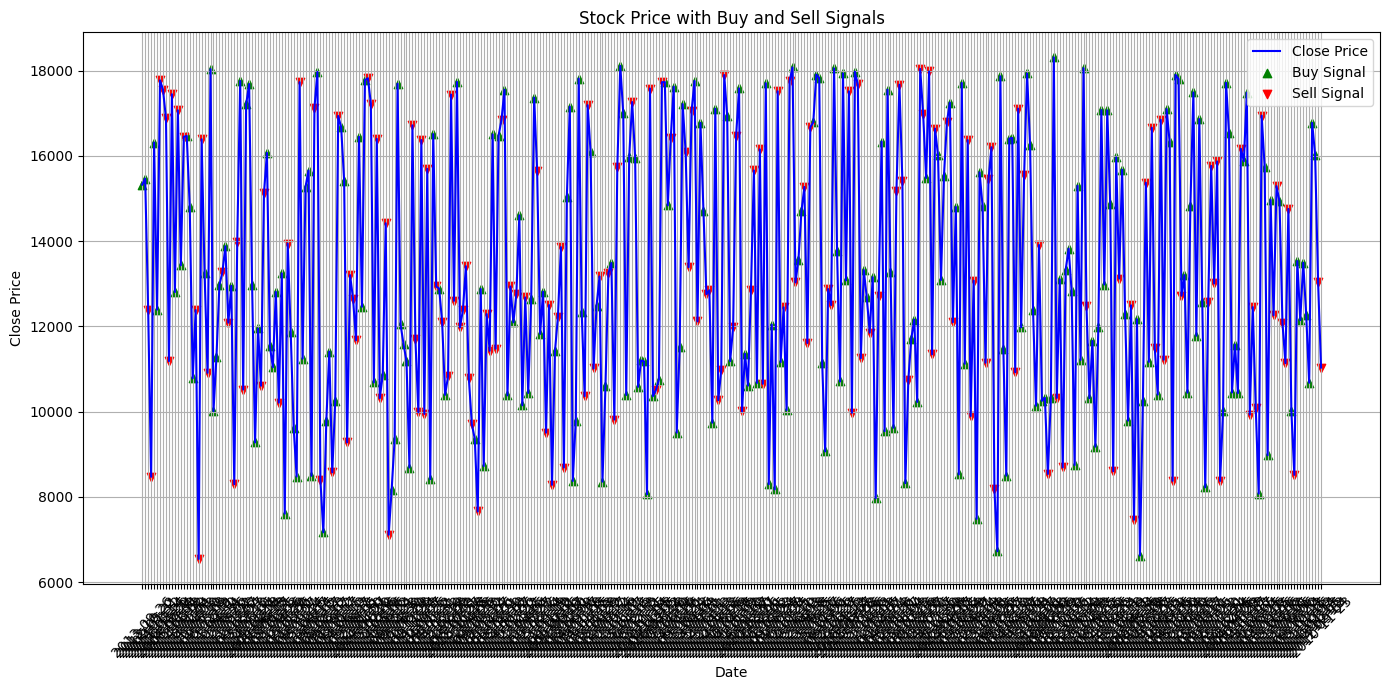

In [ ]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(x_test)

# Create a DataFrame for the test set to store the signals
test_df = pd.DataFrame(x_test, columns=X.columns)
test_df['True_Label'] = y_test.values
test_df['Predicted_Label'] = y_pred

# Generating buy and sell signals
test_df['Signal'] = np.where(test_df['Predicted_Label'] == 1, 'Buy', 'Sell')

# Merge test_df with the original merge DataFrame to get the 'Date' and 'Close' prices for the test period
test_df = test_df.merge(merge[['Date', 'Close']], left_index=True, right_index=True, how='left')

# Verify the columns in the test_df DataFrame
print("Columns in test_df DataFrame after merge:", test_df.columns)

# Separate buy and sell signals
buy_signals = test_df[test_df['Signal'] == 'Buy']
sell_signals = test_df[test_df['Signal'] == 'Sell']

# Plotting
plt.figure(figsize=(14, 7))

# Plot the close prices
plt.plot(test_df['Date'], test_df['Close_y'], label='Close Price', color='blue')

# Plot the buy signals
plt.scatter(buy_signals['Date'], buy_signals['Close_x'], label='Buy Signal', marker='^', color='green', alpha=1)

# Plot the sell signals
plt.scatter(sell_signals['Date'], sell_signals['Close_x'], label='Sell Signal', marker='v', color='red', alpha=1)

# Formatting the plot
plt.title('Stock Price with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
#In this code, we use test_df['Close_y'] to plot the close prices. This ensures we reference the correct column and avoid the KeyError. The plot will show the stock price along with the buy and sell sig

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a model named 'model' and test data 'x_test', 'y_test'
y_scores = model.predict_proba(x_test)[:, 1]  # Probability scores for positive class (class 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


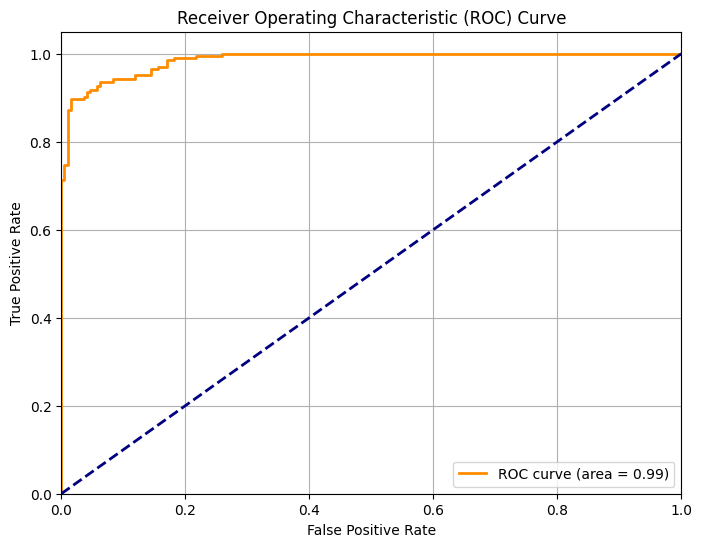

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
sharpe_ratio = np.sqrt(252) * (test_df['Close_y'].pct_change().mean() / test_df['Close_y'].pct_change().std())

# Calculate Maximum Drawdown
cumulative_returns = (1 + test_df['Close_y'].pct_change()).cumprod()
peak = cumulative_returns.expanding(min_periods=1).max()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()

# Calculate Number of Trades Executed
num_trades = len(buy_signals) + len(sell_signals)

# Calculate Win Ratio
win_ratio = len(test_df[test_df['True_Label'] == test_df['Predicted_Label']]) / len(test_df)

# Print the results
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Number of Trades Executed: {num_trades}")
print(f"Win Ratio: {win_ratio:.2%}")


Sharpe Ratio: 2.6051
Maximum Drawdown: -0.1595
Number of Trades Executed: 398
Win Ratio: 90.20%


In [ ]:
# Initialize variables
initial_investment = 1000  # Initial investment amount (hypothetical unit)
portfolio_value = [initial_investment]  # List to store portfolio value after each trade
current_portfolio = initial_investment  # Current portfolio value
returns = []  # List to store daily returns

# Iterate through each trade in test_df
previous_close = None  # Variable to store the previous close price
for index, row in test_df.iterrows():
    if previous_close is None:
        previous_close = row['Close_x']
        continue  # Skip the first row

    if row['Signal'] == 'Buy':
        current_portfolio *= (row['Close_x'] / previous_close)  # Adjust portfolio for buy signal
    elif row['Signal'] == 'Sell':
        current_portfolio *= (previous_close / row['Close_x'])  # Adjust portfolio for sell signal

    # Calculate daily return and store in returns list
    daily_return = (current_portfolio - portfolio_value[-1]) / portfolio_value[-1]
    returns.append(daily_return)

    # Store current portfolio value after each trade
    portfolio_value.append(current_portfolio)

    # Update previous_close for the next iteration
    previous_close = row['Close_x']

# Calculate final portfolio value and returns
final_portfolio_value = portfolio_value[-1]
total_returns = (final_portfolio_value - initial_investment) / initial_investment

# Print results
print(f"Final Portfolio Value: {final_portfolio_value:.2f} units")
print(f"Total Returns: {total_returns:.2%}")


Final Portfolio Value: 1881.33 units
Total Returns: 88.13%
